In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

print("imported all packages")

imported all packages


In [20]:
airports100=pd.read_csv('airports100.csv')
demandMat=pd.read_csv('demandMatrix.csv',header=None)
usaOutline=pd.read_csv('usaOutline.csv',header=None)
fareMat=pd.read_csv('fareMatrix.csv',header=None)
lengthMat=pd.read_csv('lengthMatrix.csv',header=None)

x=airports100['Longitude']
y=airports100['Latitude']

99


Text(0.5, 1.0, 'Minimum-distance spanning tree')

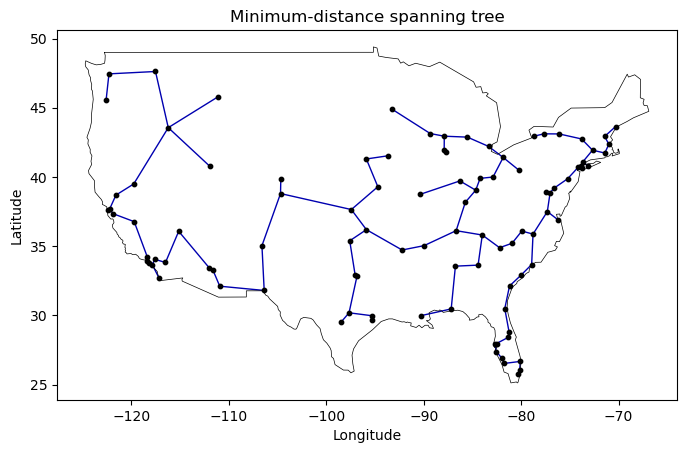

In [21]:
#plot minimum-distance spanning tree

#generate tree using scipy
mygraph1=scipy.sparse.csgraph.minimum_spanning_tree(lengthMat).toarray()
mygraph1=1*(mygraph1>0) #normalizes results to a binary matrix
print(sum(sum(mygraph1))) #to check we have the right number of edges


fig1, plot1 = plt.subplots()

for i in range(100):
    for j in range(100):
        if mygraph1[i,j]==1:
            plt.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=1)

plot1.plot(usaOutline.iloc[0,:],usaOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot1.scatter(x,y,s=10,color='k',edgecolors='k',zorder=3)

fig1.set_size_inches(8,4.8)
plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')
plot1.set_title('Minimum-distance spanning tree')

99


Text(0.5, 1.0, 'Max-demand spanning tree')

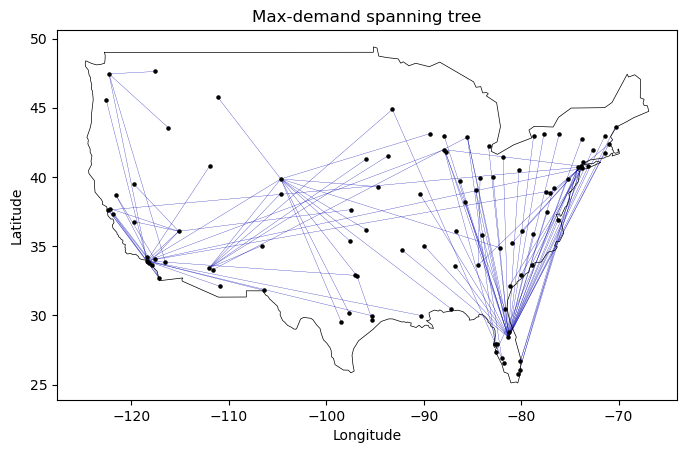

In [22]:
#plot maximum demand spanning tree

#generate "inverse" demand matrix where values have reversed ranks
inversedemand=80000-demandMat
np.fill_diagonal(inversedemand.to_numpy(), 0) #ensure diagonals are still 0

#generate "minimum" spanning tree
mygraph1=scipy.sparse.csgraph.minimum_spanning_tree(inversedemand).toarray()
mygraph1=1*(mygraph1>0) #normalizes results to a binary matrix
print(sum(sum(mygraph1))) #to check we have the right number of edges

fig1, plot1 = plt.subplots()

for i in range(100):
    for j in range(100):
        if mygraph1[i,j]==1:
            plt.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=0.2)

plot1.plot(usaOutline.iloc[0,:],usaOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot1.scatter(x,y,s=5,color='k',edgecolors='k',zorder=3)

fig1.set_size_inches(8,4.8)
plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')
plot1.set_title('Max-demand spanning tree')

99


Text(0.5, 1.0, 'Max fare-demand spanning tree')

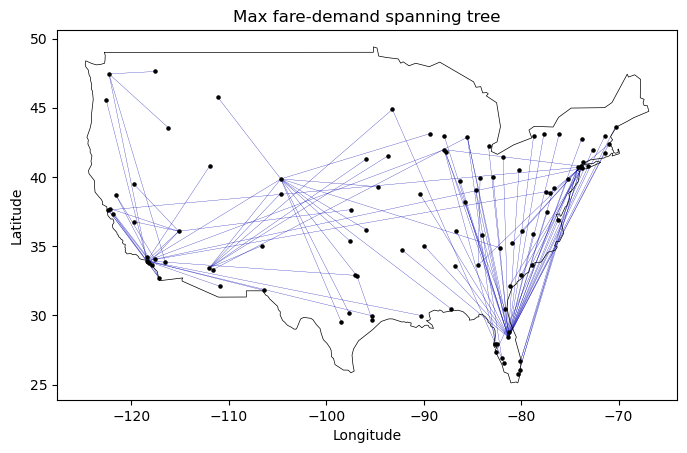

In [23]:
#plot maximum fare-demand spanning tree

#generate fare-demand matrix
faredemand=np.multiply(fareMat.to_numpy(),demandMat.to_numpy());

#generate "inverse" fare-demand matrix
inversedemand=40000000-demandMat
np.fill_diagonal(inversedemand.to_numpy(), 0) #ensure diagonals are still 0

#generate "minimum" spanning tree
mygraph1=scipy.sparse.csgraph.minimum_spanning_tree(inversedemand).toarray()
mygraph1=1*(mygraph1>0) #normalizes results to a binary matrix
print(sum(sum(mygraph1))) #to check we have the right number of edges

fig1, plot1 = plt.subplots()

for i in range(100):
    for j in range(100):
        if mygraph1[i,j]==1:
            plt.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=0.2)

plot1.plot(usaOutline.iloc[0,:],usaOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot1.scatter(x,y,s=5,color='k',edgecolors='k',zorder=3)

fig1.set_size_inches(8,4.8)
plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')
plot1.set_title('Max fare-demand spanning tree')